In [45]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)

In [46]:
df = pd.read_csv('PierceCricketData.csv')
df.head()

,Chirps,Temp
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [47]:
x_data, y_data = (df['Chirps'].values, df['Temp'].values)

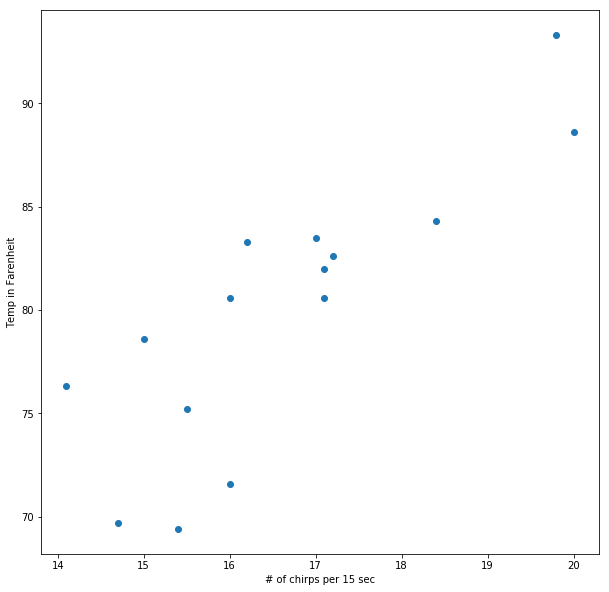

In [48]:
plt.xlabel("# of chirps per 15 sec")
plt.ylabel("Temp in Farenheit")
plt.plot(x_data, y_data, 'o')

In [49]:
X, Y = tf.placeholder(tf.float32, shape = (x_data.size)), tf.placeholder(tf.float32, shape = (y_data.size))
m, c = (tf.Variable(3.0), tf.Variable(2.0))

In [50]:
Ypred = m*X + c

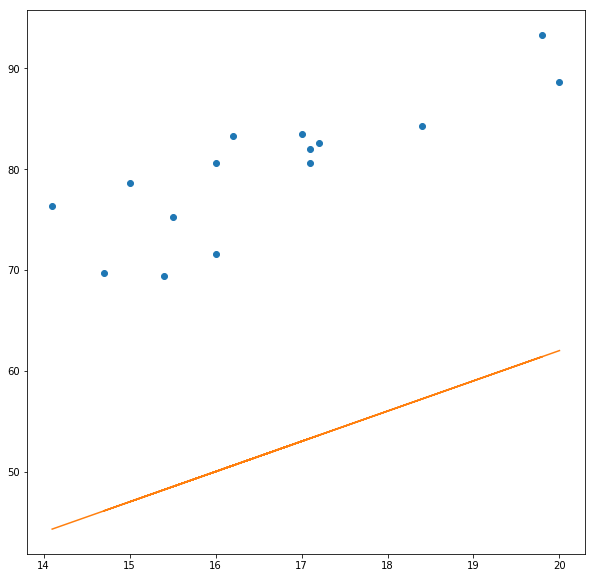

In [51]:
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    pred = session.run(Ypred, feed_dict = {X:x_data})
    plt.plot(x_data, y_data, "o")
    plt.plot(x_data, pred)

In [52]:
loss = tf.reduce_mean(tf.squared_difference(Ypred, Y))

In [68]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(loss)

In [69]:
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    train_data = []
    for step in range(100):
        evals = session.run([train, m, c], feed_dict = {X:x_data, Y:y_data})
        if step % 5 == 0:
            print(step, evals)
            train_data.append(evals)

0 [None, 470.63666, 30.073334]
5 [None, -7.9423367e+14, -4.7272872e+13]
10 [None, 1.3537115e+27, 8.0573063e+25]
15 [None, -inf, -1.3733068e+38]
20 [None, nan, nan]
25 [None, nan, nan]
30 [None, nan, nan]
35 [None, nan, nan]
40 [None, nan, nan]
45 [None, nan, nan]
50 [None, nan, nan]
55 [None, nan, nan]
60 [None, nan, nan]
65 [None, nan, nan]
70 [None, nan, nan]
75 [None, nan, nan]
80 [None, nan, nan]
85 [None, nan, nan]
90 [None, nan, nan]
95 [None, nan, nan]
